In [85]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 3.0

In [86]:
def brusselator(rvec,a,b):
    x = rvec[0]
    y = rvec[1]
    fx = 1 - (b + 1)*x + a*(x**2)*y
    fy = b*x - a*(x**2)*y
    return np.array([fx,fy])

def bs_step(r_list,t_list,r_init,delta,n_max,t_init,H,f):

    # start with the initial mod mid step to get R1,1
    n = 1
    r1 = r_init + 0.5*(H/n)*f(r_init)
    r2 = r_init + (H/n)*f(r1)

    R1 = np.empty([1,2])
    R1[0] = 0.5*(r1 + r2 + 0.5*(H/n)*f(r2))

    error = 2*H*delta
    while (error > H*delta and n <= n_max):
        n += 1
        h = H/n

        r1 = r_init + 0.5*(H/n)*f(r_init)
        r2 = r_init + (H/n)*f(r1)
        for i in range(n - 1):
            r1 += h*f(r2)
            r2 += h*f(r1)
        
        R2 = R1
        R1 = np.empty([n,2])
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1] - R2[m-1])/((n/(n-1))**(2*m) - 1)
            R1[m] = R1[m - 1] + epsilon
        error = abs(epsilon[0])
        
    if error <= H*delta:
        r_list.append(R1[n-1])
        t_list.append(t_init + H)
        return r_list,t_list,R1[n-1]
    else:
        r1_list,t1_list,r1_nextstep = bs_step(r_list,t_list,r_init,delta,n_max,t_init,H/2,f)
        r2_list,t2_list,r2_nextstep = bs_step(r1_list,t1_list,r1_nextstep,delta,n_max,t_init+H/2,H/2,f)
        return r2_list,t2_list,r2_nextstep


In [87]:
brusselator_1 = lambda rvec: brusselator(rvec=rvec,a=1,b=3)

r_init = np.array([0,0])
t_init = 0
delta = 1e-10
n_max = 8
H = 20

r_list = [r_init]
t_list = [t_init]
r_list,t_list,r_final = bs_step(r_list=r_list,t_list=t_list,r_init=r_init,delta=delta,n_max=n_max,t_init=t_init,H=H,f=brusselator_1)
r_array=np.array(r_list)
t_array=np.array(t_list)

/var/folders/vc/d_yxpy3n0_l8fdjkn2_1vwpw0000gn/T/ipykernel_73153/3080282782.py:4: RuntimeWarning: overflow encountered in scalar power
  fx = 1 - (b + 1)*x + a*(x**2)*y
/var/folders/vc/d_yxpy3n0_l8fdjkn2_1vwpw0000gn/T/ipykernel_73153/3080282782.py:5: RuntimeWarning: overflow encountered in scalar power
  fy = b*x - a*(x**2)*y
/var/folders/vc/d_yxpy3n0_l8fdjkn2_1vwpw0000gn/T/ipykernel_73153/3080282782.py:31: RuntimeWarning: invalid value encountered in add
  R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
/var/folders/vc/d_yxpy3n0_l8fdjkn2_1vwpw0000gn/T/ipykernel_73153/3080282782.py:4: RuntimeWarning: overflow encountered in scalar multiply
  fx = 1 - (b + 1)*x + a*(x**2)*y
/var/folders/vc/d_yxpy3n0_l8fdjkn2_1vwpw0000gn/T/ipykernel_73153/3080282782.py:5: RuntimeWarning: overflow encountered in scalar multiply
  fy = b*x - a*(x**2)*y
/var/folders/vc/d_yxpy3n0_l8fdjkn2_1vwpw0000gn/T/ipykernel_73153/3080282782.py:33: RuntimeWarning: invalid value encountered in subtract
  epsilon = (R1[m-1] - R2[m-1])

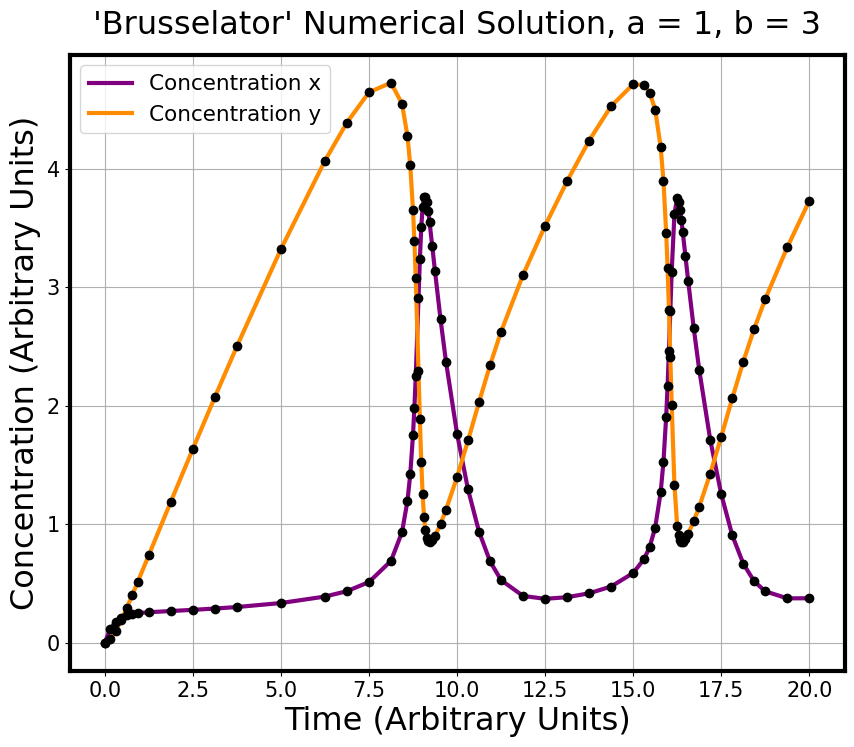

In [90]:
fig, ax_main = plt.subplots(figsize=(10, 8))
ax_main.plot(t_array, r_array[:,0:1],label='Concentration x',color='purple',lw=3)
ax_main.plot(t_array, r_array[:,1:2],label='Concentration y',color='darkorange',lw=3)
ax_main.scatter(t_array,r_array[:,0:1],color='k',zorder=2)
ax_main.scatter(t_array,r_array[:,1:2],color='k',zorder=2)
ax_main.set_xlabel('Time (Arbitrary Units)',fontsize=23)
ax_main.set_ylabel('Concentration (Arbitrary Units)',fontsize=23)
ax_main.set_title('\'Brusselator\' Numerical Solution, a = 1, b = 3',fontsize=23, pad=15)
ax_main.tick_params(axis='both', which='major', labelsize=15)
ax_main.grid(True)
ax_main.legend(loc='upper left',fontsize=15.5)
plt.savefig(f'./hw4_p1_brusselator',bbox_inches="tight")
